# Finance Data Analysis

Exploratory data analysis of stock prices. 

I'm focusing on bank stocks and see how they progressed from the year 2002 throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) and the COVID-19 Lockdown all the way to 2022.

In [1]:
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using Yahoo Finance. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
import yfinance as yf

In [3]:
start_date = '2002-01-01'
end_date = '2022-01-01'

In [4]:
# Bank of America
BAC = yf.download("BAC", start=start_date, end=end_date)
BAC.head(5)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,31.155001,31.549999,31.055000,31.480000,18.560368,8669200
2002-01-03,31.480000,31.950001,31.379999,31.445000,18.539736,8237600
2002-01-04,31.559999,32.075001,31.504999,31.934999,18.828627,10598600
2002-01-07,31.200001,31.690001,31.200001,31.555000,18.604593,10852200
2002-01-08,31.350000,31.445000,30.875000,31.049999,18.306845,11914200


In [5]:
# CitiGroup
C = yf.download("C", start=start_date, end=end_date)

# Goldman Sachs
GS = yf.download("GS", start=start_date, end=end_date)

# JPMorgan Chase
JPM = yf.download("JPM", start=start_date, end=end_date)

# Morgan Stanley
MS = yf.download("MS", start=start_date, end=end_date)

# Wells Fargo
WFC = yf.download("WFC", start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
df = yf.download(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], start=start_date, end=end_date)

[*********************100%%**********************]  6 of 6 completed


Creating a list of the ticker symbols (as strings) in alphabetical order. 

In [7]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [8]:
dfs = [BAC, C, GS, JPM, MS, WFC]
bank_stocks = pd.concat(dfs,axis=1,keys=tickers)

In [9]:
bank_stocks.head()

BAC                                                        \
                 Open       High        Low      Close  Adj Close    Volume   
Date                                                                          
2002-01-02  31.155001  31.549999  31.055000  31.480000  18.560368   8669200   
2002-01-03  31.480000  31.950001  31.379999  31.445000  18.539736   8237600   
2002-01-04  31.559999  32.075001  31.504999  31.934999  18.828627  10598600   
2002-01-07  31.200001  31.690001  31.200001  31.555000  18.604593  10852200   
2002-01-08  31.350000  31.445000  30.875000  31.049999  18.306845  11914200   

                     C                                      ...         MS  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2002-01-02  500.200012  511.000000  499.100006  510.100006  ...  53.990002   
2002-01-03  507.000000  514.000000  502.500000  510.500000  ...  55.340000   
2002-01-04  511.500000  520.000000  511.500000  520.000000  ...  58.500000   
2002-01-07  519.900024  522.000000  511.600006  513.900024  ...  59.049999   
2002-01-08  509.500000  510.600006  492.500000  495.000000  ...  57.869999   

                                                 WFC                     \
                Close  Adj Close   Volume       Open    High        Low   
Date                                                                      
2002-01-02  55.220001  29.399105  3856500  21.690001  21.740  21.450001   
2002-01-03  56.820000  30.250929  5507500  21.719999  21.865  21.625000   
2002-01-04  59.639999  31.752289  7576500  21.875000  21.990  21.674999   
2002-01-07  59.189999  31.512711  4050900  21.975000  22.045  21.870001   
2002-01-08  57.950001  30.852531  4591000  21.975000  21.975  21.629999   

                                            
                Close  Adj Close    Volume  
Date                                        
2002-01-02  21.719999  11.727082   8024000  
2002-01-03  21.799999  11.770265   7569600  
2002-01-04  21.855000  11.799966  10441600  
2002-01-07  21.889999  11.818862   7019800  
2002-01-08  21.805000  11.772972   6435000  

[5 rows x 36 columns]

** Set the column name levels (this is filled out for you):**

In [10]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [11]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2002-01-02   31.155001  31.549999  31.055000  31.480000  18.560368   8669200   
2002-01-03   31.480000  31.950001  31.379999  31.445000  18.539736   8237600   
2002-01-04   31.559999  32.075001  31.504999  31.934999  18.828627  10598600   
2002-01-07   31.200001  31.690001  31.200001  31.555000  18.604593  10852200   
2002-01-08   31.350000  31.445000  30.875000  31.049999  18.306845  11914200   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2002-01-02   500.200012  511.000000  499.100006  510.100006  ...  53.990002   
2002-01-03   507.000000  514.000000  502.500000  510.500000  ...  55.340000   
2002-01-04   511.500000  520.000000  511.500000  520.000000  ...  58.500000   
2002-01-07   519.900024  522.000000  511.600006  513.900024  ...  59.049999   
2002-01-08   509.500000  510.600006  492.500000  495.000000  ...  57.869999   

Bank Ticker                                       WFC                     \
Stock Info       Close  Adj Close   Volume       Open    High        Low   
Date                                                                       
2002-01-02   55.220001  29.399105  3856500  21.690001  21.740  21.450001   
2002-01-03   56.820000  30.250929  5507500  21.719999  21.865  21.625000   
2002-01-04   59.639999  31.752289  7576500  21.875000  21.990  21.674999   
2002-01-07   59.189999  31.512711  4050900  21.975000  22.045  21.870001   
2002-01-08   57.950001  30.852531  4591000  21.975000  21.975  21.629999   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2002-01-02   21.719999  11.727082   8024000  
2002-01-03   21.799999  11.770265   7569600  
2002-01-04   21.855000  11.799966  10441600  
2002-01-07   21.889999  11.818862   7019800  
2002-01-08   21.805000  11.772972   6435000  

[5 rows x 36 columns]

# Exploratory Data Analysis 

Finding the max Close price for each bank's stock throughout the time period

In [12]:
for i in tickers:
    print(i,":",bank_stocks[i]['Close'].max())

BAC : 54.900001525878906
C : 564.0999755859375
GS : 423.8500061035156
JPM : 171.77999877929688
MS : 105.44999694824219
WFC : 65.93000030517578


In [13]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     423.850006
JPM    171.779999
MS     105.449997
WFC     65.930000
dtype: float64

##### Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [14]:
returns = pd.DataFrame()

In [15]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2002-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,-0.001112,0.000784,0.015153,0.026685,0.028975,0.003683
2002-01-04,0.015583,0.018609,0.046512,0.045016,0.049630,0.002523
2002-01-07,-0.011899,-0.011731,-0.010336,-0.002564,-0.007545,0.001601
2002-01-08,-0.016004,-0.036778,-0.033943,-0.007712,-0.020949,-0.003883


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


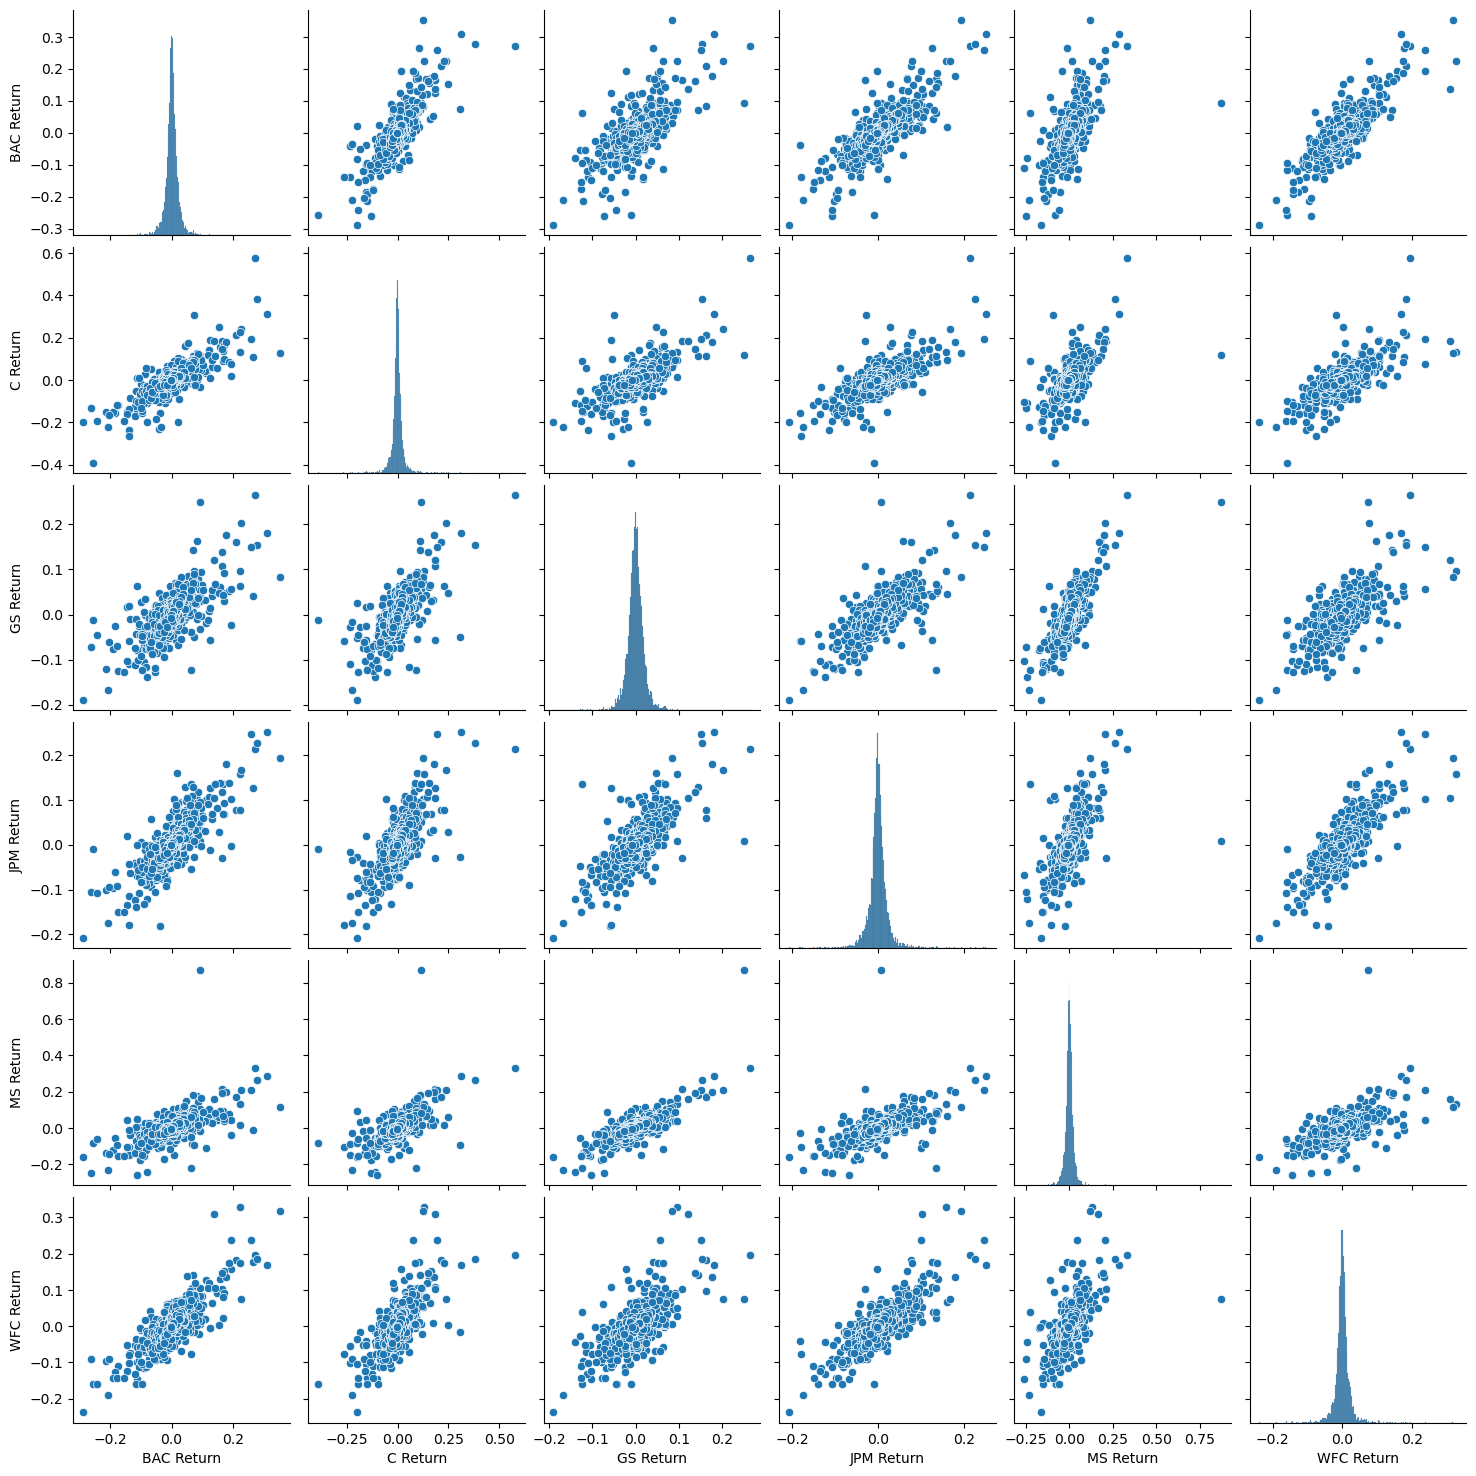

In [16]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

Background on [Citigroup's Stock Crash available here.](https://en.wikipedia.org/wiki/Citigroup#November_2008.2C_Collapse_.26_US_Government_Intervention_.28part_of_the_Global_Financial_Crisis.29) 

### Using the returns DataFrame, figuring out on the dates each bank stock had the best and worst single day returns.

In [17]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

### We notice that Citigroup's largest drop and biggest gain were very close to one another

In [18]:
# Best Single Day Gain
# Citigroup stock split in May 2011, but also JPM day after inauguration.
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

[Citigroup had a stock split.](https://www.google.com/search?q=citigroup+stock+2011+May&rlz=1C1YTUH_enIN1058IN1058&oq=citigroup+stock+2011+May&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIHCAEQIRigATIHCAIQIRigAdIBCDY2OTFqMWo0qAIAsAIA&sourceid=chrome&ie=UTF-8)

In [19]:
returns.std() # Citigroup riskiest

BAC Return    0.028969
C Return      0.031109
GS Return     0.022144
JPM Return    0.024016
MS Return     0.030587
WFC Return    0.024800
dtype: float64

### Returns During the peroid of COVID-19 Lockdown

In [20]:
returns.loc['2020-05-01':'2021-12-31'].std() # Very similar risk profiles, Wells Fargo the highest and JP Morgan the lowest

BAC Return    0.021319
C Return      0.023632
GS Return     0.019379
JPM Return    0.018584
MS Return     0.020093
WFC Return    0.025610
dtype: float64

### Creating a distplot using seaborn of the 2021 returns for Wells Fargo

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


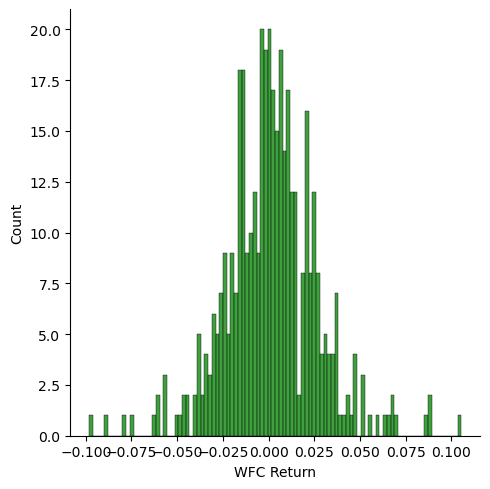

In [21]:
sns.displot(returns.loc['2020-05-01':'2021-12-31']['WFC Return'],color='green',bins=100)

### Creating a distplot using seaborn of the 2008 returns for CitiGroup

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


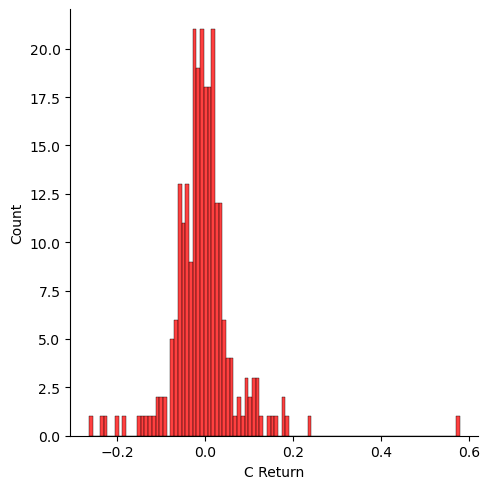

In [22]:
sns.displot(returns.loc['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)


## More Visualizations


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

### Create a line plot showing Close price for each bank for the entire index of time.

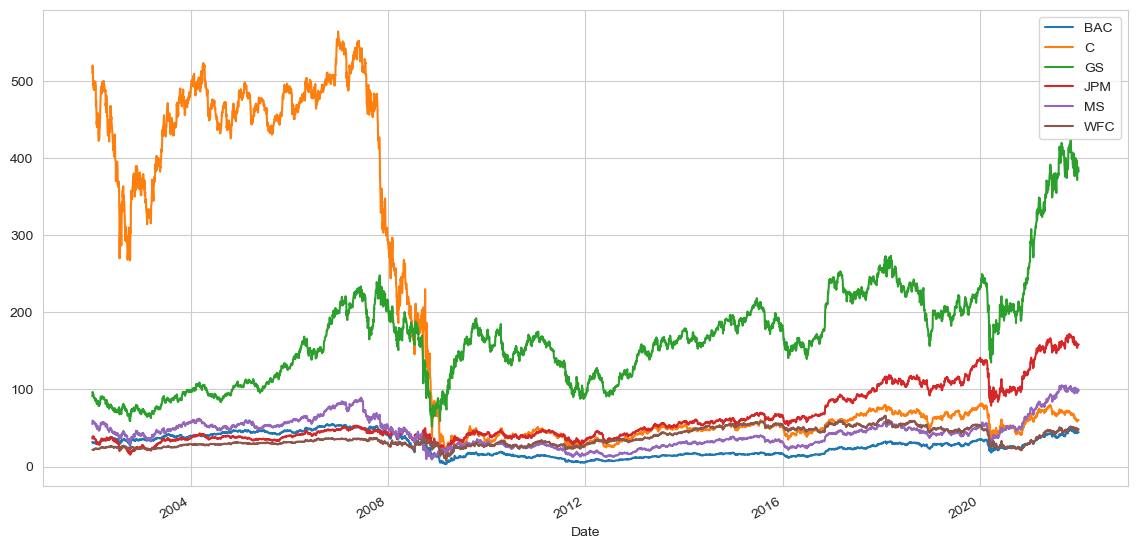

In [29]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(14,7),label=tick)
plt.legend()

<Axes: xlabel='Date'>

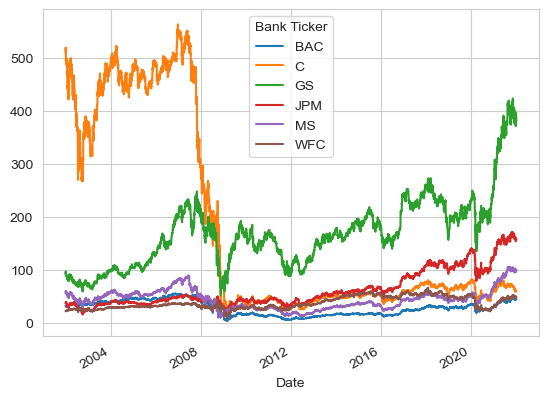

In [28]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [30]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Analyzing the moving averages for these stocks in the year 2021. 

Plotting the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2021

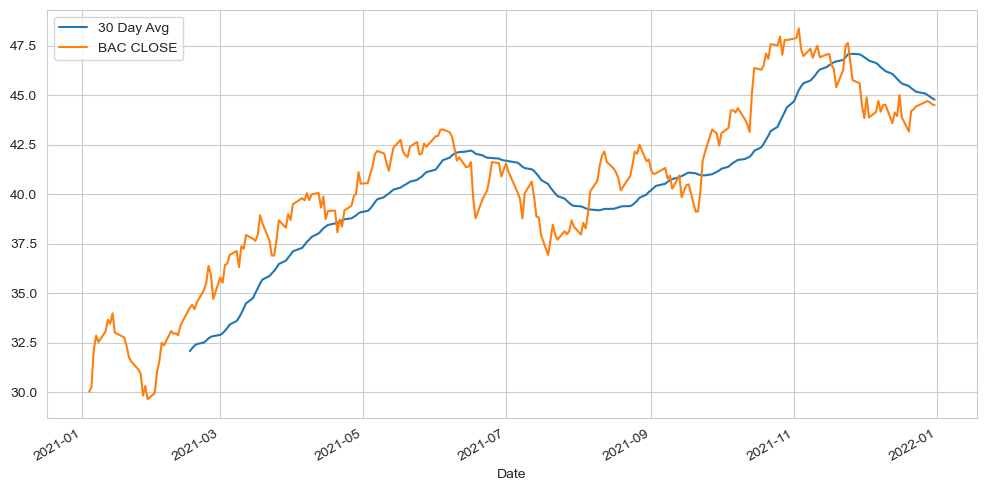

In [36]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2021-01-01':'2022-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2021-01-01':'2022-01-01'].plot(label='BAC CLOSE')
plt.legend()

Creating a heatmap of the correlation between the stocks Close Price

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

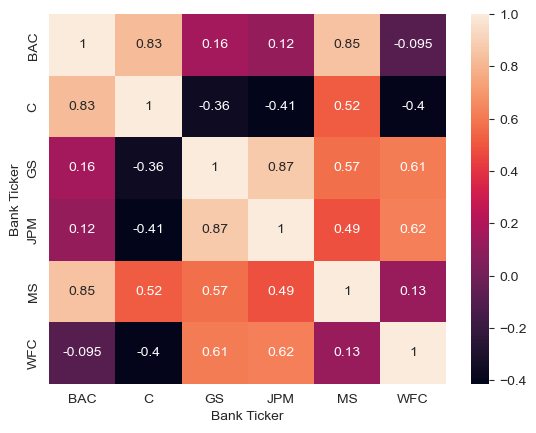

In [37]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

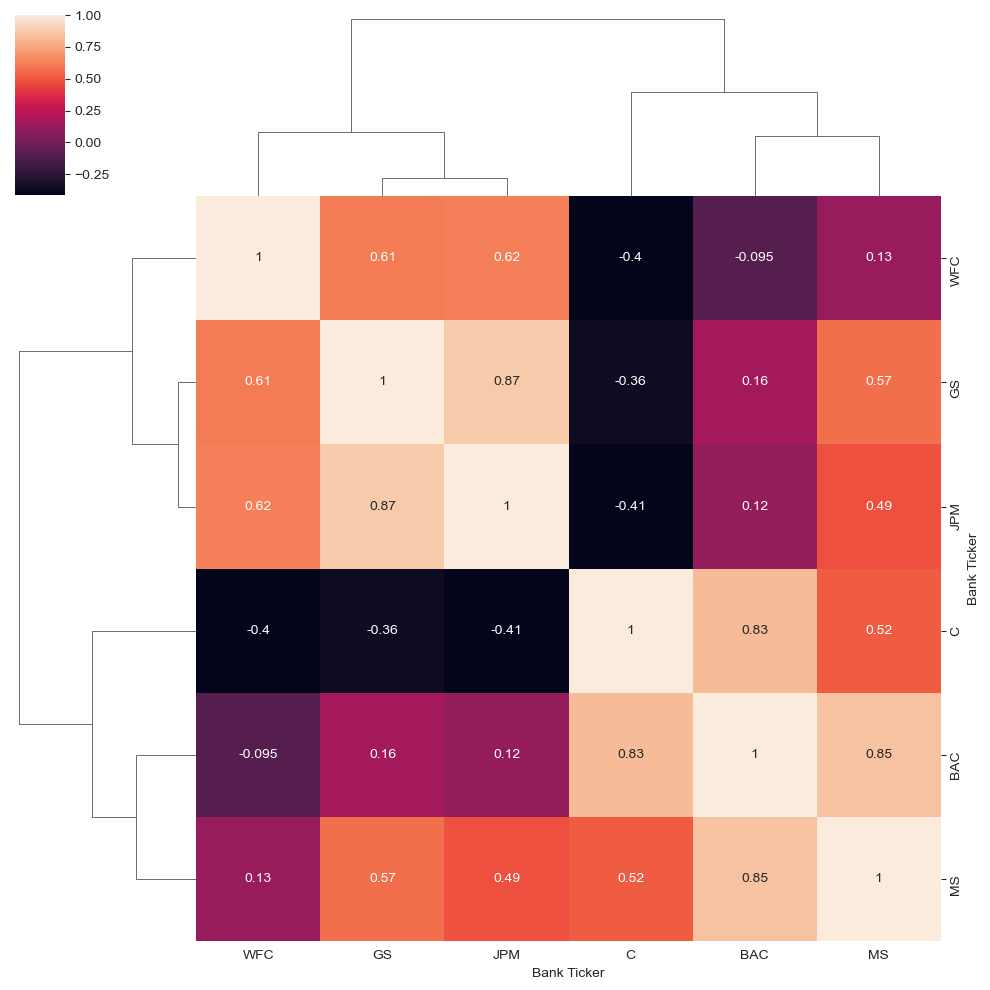

In [38]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [39]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

### Candle plot of Morgan Stanley's stock from Jan 1st 2020 to Jan 1st 2021

In [41]:
MS[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2021-01-01'].iplot(kind='candle')

### Moving Averages plot of Morgan Stanley for the year 2020

In [45]:
MS['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

### Bollinger Band Plot for Bank of America for the year 2021.**

In [47]:
BAC['Close'].loc['2021-01-01':'2022-01-01'].ta_plot(study='boll')